# Airfoil self noise regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('C:/Users/rgiammatteo/Google Drive/Machine Learning/airfoil_self_noise.dat', sep='\t', header=None)
dataset.columns = ('freq', 'attack_angle', 'chord', 'fs_velocity', 'ssd_thickness', 'ss_pressure_level')

In [3]:
dataset.head()

,freq,attack_angle,chord,fs_velocity,ssd_thickness,ss_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


Checking for null or not assigned values

In [4]:
dataset.isnull().sum()

freq                 0
attack_angle         0
chord                0
fs_velocity          0
ssd_thickness        0
ss_pressure_level    0
dtype: int64

In [5]:
dataset.isna().sum()

freq                 0
attack_angle         0
chord                0
fs_velocity          0
ssd_thickness        0
ss_pressure_level    0
dtype: int64

Plotting the distribution of the features

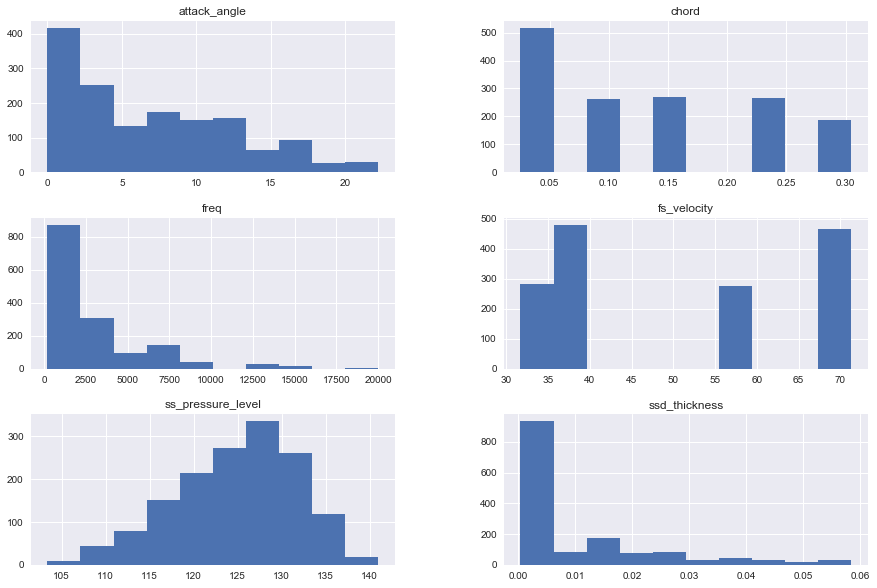

In [6]:
sns.set()
dataset.hist(figsize=(15,10))
plt.show()

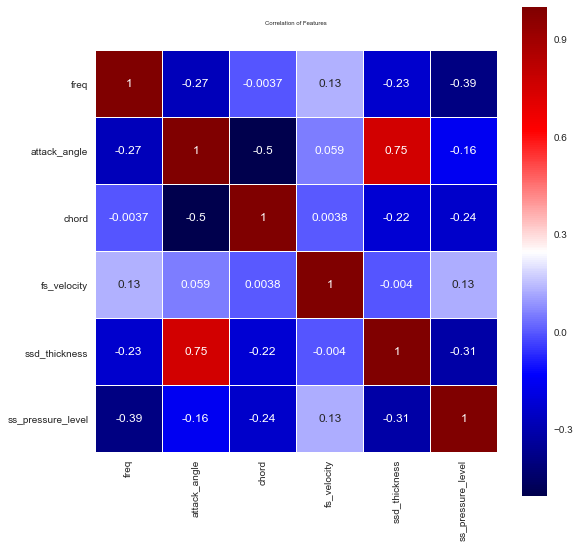

In [7]:
#correlation of features
#colormap = plt.cm.viridis
#colormap = plt.cm.plasma
colormap = plt.cm.seismic
plt.figure(figsize=(9,9))
plt.title('Correlation of Features', y=1.05, size=6)
sns.heatmap(dataset.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, 
            linecolor='white', annot=True)
plt.show()

In [8]:
dataset.shape

(1503, 6)

In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
# Train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 0)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
y_test_pred = regressor.predict(X_test)

In [13]:
(y_test_pred - y_test) / y_test

array([-0.0367295 ,  0.00799238,  0.06920817,  0.09685335, -0.02435385,
        0.06264185,  0.0144105 ,  0.02414641,  0.04202407,  0.01596634,
       -0.00500267, -0.03829009,  0.01304204,  0.02882733, -0.02054305,
        0.05235564,  0.01583709, -0.07839841,  0.00055495,  0.07601412,
       -0.01143175, -0.02215764, -0.02142377,  0.04184229, -0.0407138 ,
        0.00635851, -0.00450691, -0.08584736, -0.0205624 , -0.01560927,
        0.00644508,  0.01097909,  0.05951212,  0.00651296, -0.02969559,
       -0.01053894,  0.00431174, -0.05333422, -0.00605167,  0.00459385,
       -0.00504096, -0.02058778, -0.09761338, -0.03803697,  0.04898214,
       -0.03583001, -0.00241867,  0.00262441,  0.04769416, -0.04341284,
       -0.02082312, -0.02219211, -0.01239405, -0.01500434,  0.0073686 ,
        0.01214165,  0.00290482, -0.02057169,  0.02098775,  0.01034974,
        0.02409317, -0.05902806,  0.00150187, -0.04343083, -0.01356302,
        0.00571343, -0.00168207, -0.04478617, -0.02616638,  0.13

In [14]:
lin_reg_r2 = regressor.score(X_test, y_test)
lin_reg_r2

0.5890517146400599

regressor.score gives the same result of sklearn.metrics.r2_score: 

In [15]:
from sklearn.metrics import r2_score
sk_metrics_r2 = r2_score(y_test, y_test_pred)
sk_metrics_r2

0.5890517146400599

In [16]:
from sklearn.metrics import mean_squared_error

mse_lin_reg = mean_squared_error(y_test, y_test_pred)
mse_lin_reg

19.53513769892804

In [18]:
mse_lin_reg / y_test.mean()

0.15584512678121826

In [19]:
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=3)

X_poly = polyFeat.fit_transform(X)
#X_poly.shape

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.08, random_state = 0)

poly_regressor = LinearRegression()

poly_regressor.fit(X_train, y_train)

poly_reg_r2 = poly_regressor.score(X_test, y_test)
poly_reg_r2

0.72306499014093628

In [31]:
mse_poly_reg = mean_squared_error(y_test, poly_regressor.predict(X_test))
mse_poly_reg

13.164584800523846